# Introduction to Regression in R

Linear regression and logistic regression are the two most widely used statistical models and act like master keys, unlocking the secrets hidden in datasets. In this course, you’ll gain the skills you need to fit simple linear and logistic regressions. Through hands-on exercises, you’ll explore the relationships between variables in real-world datasets, including motor insurance claims, Taiwan house prices, fish sizes, and more. By the end of this course, you’ll know how to make predictions from your data, quantify model performance, and diagnose problems with model fit.

## Simple Linear Regression

You’ll learn the basics of this popular statistical model, what regression is, and how linear and logistic regressions differ. You’ll then learn how to fit simple linear regression models with numeric and categorical explanatory variables, and how to describe the relationship between the response and explanatory variables using model coefficients.

### Visualizing two variables
Before you can run any statistical models, it's usually a good idea to visualize your dataset. Here, we'll look at the relationship between house price per area and the number of nearby convenience stores, using the Taiwan real estate dataset.

One challenge in this dataset is that the number of convenience stores contains integer data, causing points to overlap. To solve this, you will make the points transparent.

taiwan_real_estate is available, ggplot2 is loaded, and its black and white theme has been set.

'data.frame':	414 obs. of  4 variables:
 $ dist_to_mrt_m  : num  84.9 306.6 562 562 390.6 ...
 $ n_convenience  : num  10 9 5 5 5 3 7 6 1 3 ...
 $ house_age_years: Ord.factor w/ 3 levels "0 to 15"<"15 to 30"<..: 3 2 1 1 1 1 3 2 3 2 ...
 $ price_twd_msq  : num  11.5 12.8 14.3 16.6 13 ...


dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
84.87882,10,30 to 45,11.467474
306.59470,9,15 to 30,12.768533
561.98450,5,0 to 15,14.311649
561.98450,5,0 to 15,16.580938
390.56840,5,0 to 15,13.040847
2175.03000,3,0 to 15,9.712557


`geom_smooth()` using formula 'y ~ x'


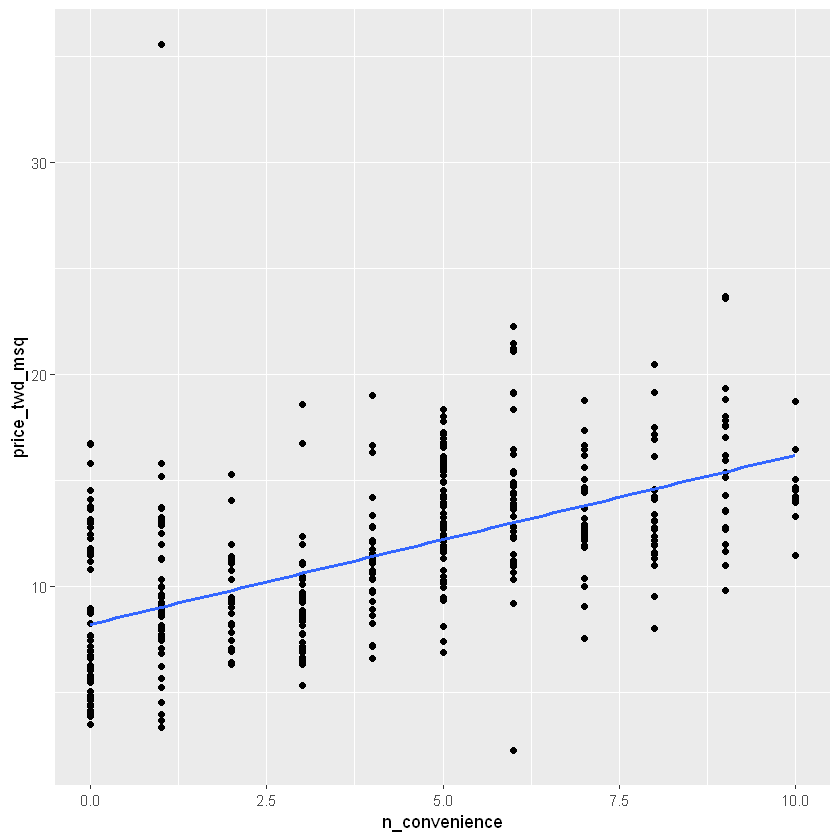

In [8]:
# install.packages("fst")
library(fst)
library(ggplot2)
# read and see data 
taiwan_real_estate = read_fst("taiwan_real_estate.fst")
str(taiwan_real_estate)
head(taiwan_real_estate)
# Draw a scatter plot of n_convenience vs. price_twd_msq
ggplot(taiwan_real_estate, aes(x = n_convenience, y = price_twd_msq)) + geom_point() + geom_smooth(method = "lm", se = FALSE)


### Estimate the intercept & slope
Linear regression models always fit a straight line to the data. Straight lines are defined by two properties: their intercept and their slope.

Here, you can see a scatter plot of house price per area versus number of nearby convenience stores, using the Taiwan real estate dataset.


In [10]:
lm(price_twd_msq ~ n_convenience, data = taiwan_real_estate)


Call:
lm(formula = price_twd_msq ~ n_convenience, data = taiwan_real_estate)

Coefficients:
  (Intercept)  n_convenience  
       8.2242         0.7981  


### Visualizing numeric vs. categorical
If the explanatory variable is categorical, the scatter plot that you used before to visualize the data doesn't make sense. Instead, a good option is to draw a histogram for each category.

The Taiwan real estate dataset has a categorical variable in the form of the age of each house. The ages have been split into 3 groups: 0 to 15 years, 15 to 30 years, and 30 to 45 years.

!!! When you only have a single, categorical explanatory variable, the linear regression coefficients are the means of each category.

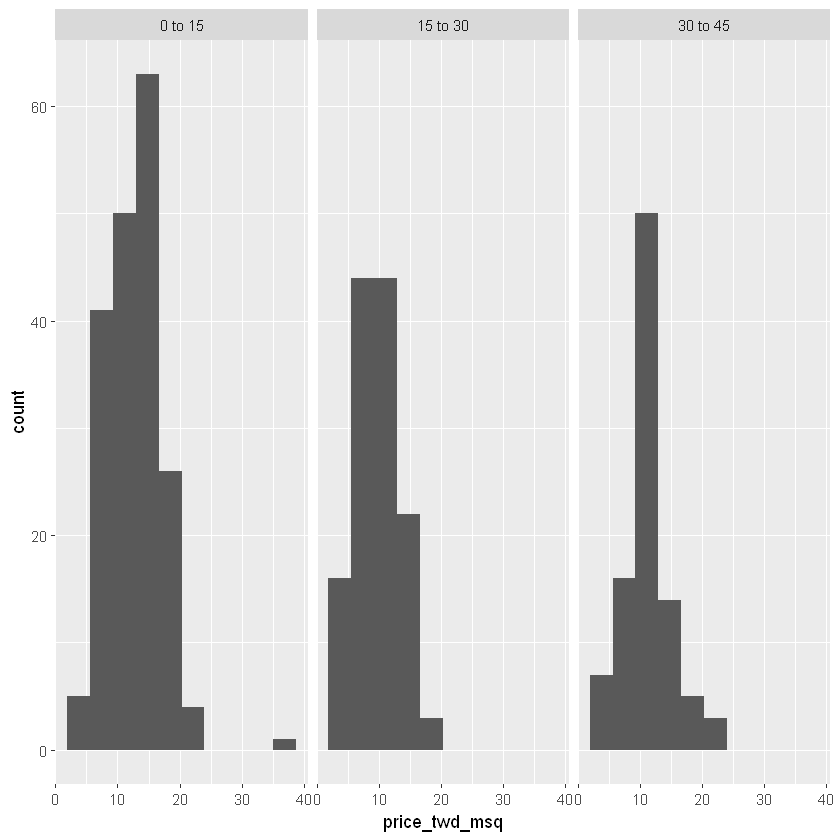

In [12]:
# Using taiwan_real_estate, plot price_twd_msq
ggplot(taiwan_real_estate, aes(price_twd_msq)) +
  # Make it a histogram with 10 bins
  geom_histogram(bins = 10) +
  # Facet the plot so each house age group gets its own panel
  facet_wrap(~house_age_years)

### Calculating means by category
A good way to explore categorical variables is to calculate summary statistics such as the mean for each category. Here, you'll look at grouped means for the house prices in the Taiwan real estate dataset.

In [14]:
library(dplyr)

summary_stats <- taiwan_real_estate %>% 
  # Group by house age
  group_by(house_age_years) %>% 
  # Summarize to calculate the mean house price/area
  summarize(mean_by_group = mean(price_twd_msq))

# See the result
summary_stats

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

`summarise()` ungrouping output (override with `.groups` argument)


house_age_years,mean_by_group
0 to 15,12.637471
15 to 30,9.876743
30 to 45,11.393264


### lm() with a categorical explanatory variable
Linear regressions also work with categorical explanatory variables. In this case, the code to run the model is the same, but the coefficients returned by the model are different. Here you'll run a linear regression on the Taiwan real estate dataset.

In [15]:
# Run a linear regression of price_twd_msq vs. house_age_years
mdl_price_vs_age <- lm(price_twd_msq ~house_age_years, data = taiwan_real_estate)

# See the result
mdl_price_vs_age


Call:
lm(formula = price_twd_msq ~ house_age_years, data = taiwan_real_estate)

Coefficients:
      (Intercept)  house_age_years.L  house_age_years.Q  
          11.3025            -0.8798             1.7462  


In [18]:
# Update the model formula to remove the intercept
mdl_price_vs_age_no_intercept <- lm(
  price_twd_msq ~ house_age_years + 0, # add 0 to remove the intercept
  data = taiwan_real_estate
)

# See the result
mdl_price_vs_age_no_intercept

# check that When you only have a single, categorical explanatory variable, the linear regression coefficients are the means of each category.


Call:
lm(formula = price_twd_msq ~ house_age_years + 0, data = taiwan_real_estate)

Coefficients:
 house_age_years0 to 15  house_age_years15 to 30  house_age_years30 to 45  
                 12.637                    9.877                   11.393  
